In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from pandas.tools.plotting import scatter_matrix
from matplotlib.artist import setp

plt.rcParams['figure.figsize'] = (16,16)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [2]:
df1=pd.read_csv("DataNN.txt")
df2 = df1.copy()
classes = df1.iloc[:,-1].copy()
df1 = df1.iloc[:,0:-1].copy()
#df1 = (df1-np.min(df1, axis = 0))/(np.max(df1, axis = 0)-np.min(df1, axis = 0))+0.01 #Boxcox values must be positive
df1 = (df1-np.mean(df1, axis = 0))/(np.std(df1, axis = 0))

df1

,Mean_FCC1,Mean_FCC2,Mean_FCC3,Mean_FCC4,Mean_FCC5,Mean_FCC6,Mean_FCC7,Mean_FCC8,Mean_FCC9,Mean_FCC10,...,DER2_FCC7,DER2_FCC8,DER2_FCC9,DER2_FCC10,DER2_FCC11,DER2_FCC12,LENGTH,MINFREC,MAXFREC,DOMFREC
0,-0.037072,0.151833,0.467133,-0.243469,0.377079,-0.330127,0.359430,-0.206106,0.290794,-0.100906,...,-0.224014,0.008211,-0.144813,0.012702,-1.073404,-0.012702,-0.442405,0.147298,-0.206577,-0.029646
1,-0.674306,-0.702380,0.930034,0.003890,0.884340,-0.365400,0.904189,-0.367941,0.738815,-0.212006,...,-0.064666,-0.023763,-0.066813,-0.001497,-0.399401,0.001497,-0.721771,0.086257,-0.287262,-0.030568
2,0.796588,-0.051883,1.175866,-1.259668,0.269421,-0.863876,-0.593208,-0.171436,0.315916,-0.367398,...,-0.953643,0.722114,0.885455,0.116261,-0.763994,-0.116261,0.535319,0.103726,0.107129,0.356606
3,0.080494,-0.009501,0.556963,-0.310354,0.300041,-0.455534,0.435348,-0.442042,0.405029,-0.234277,...,-0.063736,-0.182047,-0.054460,-0.056998,-0.087690,0.056998,-0.651924,0.121145,-0.197647,-0.047787
4,0.617746,0.174778,-0.054875,-1.160769,1.566239,0.987477,2.086930,0.827960,1.453625,-0.042288,...,-1.903178,-0.799436,-0.182161,-0.528774,-0.682836,0.528774,0.605166,-0.000887,-0.009381,-0.016475
5,0.371101,0.372037,0.482308,-0.994398,-0.016035,0.130452,0.678027,-0.817117,0.297945,-0.297373,...,-0.365472,0.073549,0.057508,-0.389711,-0.691257,0.389711,-0.163062,0.112410,-0.009381,0.031698
6,0.551394,-0.125115,1.194746,-1.377535,-0.194122,-2.188093,0.146236,-0.331491,0.107014,-1.215254,...,0.219667,1.935301,-0.132219,0.069375,-0.891542,-0.069375,-0.163062,0.112410,0.080234,0.332315
7,-1.317921,-0.378291,0.713237,-0.232893,0.645394,-0.449011,0.707309,-0.414363,0.596022,-0.229405,...,-0.252132,0.032368,-0.164855,0.022637,-1.910211,-0.022637,-1.280462,0.103726,-0.305175,-0.057114
8,0.832756,-0.017534,1.491100,-1.074713,-0.673646,-1.339109,-2.225026,-0.554582,1.684673,-0.271037,...,-1.064880,-1.430137,0.469709,-0.531607,-0.573725,0.531607,0.046457,0.103726,0.178832,0.022883
9,-0.256977,-1.290500,0.284035,0.040192,0.972080,-0.237964,0.910769,-0.177331,0.875587,-0.018624,...,0.555129,0.354915,-0.037756,-0.052973,-0.740431,0.052973,-0.931267,0.060104,-0.224490,0.020269


In [3]:
NumVariables = df1.shape[1]
NumVariables

76

In [4]:
X = np.array(df1)
y = np.array(classes)-1.0
y

array([ 0.,  0.,  0., ..., 11., 11., 11.])

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def clearList(L): #arroja una lista de L elementos vacios, no sabia de qué otra forma hacerla
    listica = []
    for i in range(0,L):
        listica.append([]);
    return listica

def RedNeuronalTrain(X,y,Lsizes,alpha = .1,epochs = 20,outputs = 2):
    N  = X.shape[0]   #número de muestras para realizar el entrenamiento
    nf = X.shape[1]   #número de características
    L = len(Lsizes)   #número de capas ocultas
    w_ = []           #pesos de la red neuronal
    error_array = []
    w_.append(np.random.rand(Lsizes[0],nf+1)) #Primera capa: L_1 filas & nf + 1 columnas (añadiendo la neurona de BIAS)
    for k in range(0,L-1):
        w_.append(np.random.rand(Lsizes[k+1],(Lsizes[k]+1)))#capa siguiente en las filas y capa actual columnas
    w_.append(np.random.rand(outputs,Lsizes[L-1]+1))        #Ultima capa interna: ourput_N flas & L_final columnas 
                                                            #(añadiendo la neurona de BIAS) 
    for j in range(0,epochs): #condición de parada
        J = 0                 #error cuadratico medio  
        for i in range(0,N):
            #One hot encoding
            Y = np.zeros(shape=(outputs,1))
            Y[int(y[i])] = 1.0
            a_ = []
            z_ = []
            #Forward
            #Para cada muestra
            a_.append(X[i,None].T)
            #Se agrega el bias de la capa entrada
            for k in range(0,(L+1)):
                #Se agrega el bias a la capa externa k+1
                a_[k] = np.insert(a_[k], 0, 1,axis=0)
                z_.append(np.dot(w_[k],a_[k]))
                a_.append(sigmoid(z_[k]))
            #Backward
            J = J + np.sum((Y-a_[len(a_)-1])*(Y-a_[len(a_)-1]))
            d_=clearList(len(a_))
            
            d_[L+1]= (Y-a_[L+1])*d_sigmoid(z_[L])
            for k in range(L,0,-1):
                d_[k] = np.dot(w_[k].T,d_[k+1])
                d_[k] = np.delete(d_[k],0,axis=0)
                d_[k] = d_[k]*d_sigmoid(z_[k-1])
                
            DE_dw_=clearList(len(w_))
            for k in range(0,len(w_)):
                DE_dw_[k] = -np.dot(d_[k+1],a_[k].T)
            for k in range(0,len(w_)):
                w_[k] = w_[k]-alpha*DE_dw_[k]
            #print(np.array(Y) == np.array(a_[len(a_)-1]))
        error_array.append(J/2)
    return [w_,J/2,error_array]

def Predict(X,w_): 
    #Forward
    #Para cada muestra
    L = len(w_)
    a_ = []
    z_ = []
    a_.append(X[:,None])
    for k in range(0,(L)):
        #Se agrega el bias a la capa externa k+1
        a_[k] = np.insert(a_[k], 0, 1,axis=0)
        z_.append(np.dot(w_[k],a_[k]))
        a_.append(sigmoid(z_[k]))
    return a_[len(a_)-1]


In [6]:
index=np.random.permutation(X.shape[0])
X1    = X[index,:]
y1    = y[index  ]

Nsamples = X.shape[0]
Ntrain   = int(0.7*Nsamples)
Nval     = int(0.15*Nsamples)
Ntest    = Nsamples-Ntrain-Nval

X_train = X1[0:Ntrain,:]
X_val   = X1[Ntrain:(Ntrain+Nval),:]
X_test  = X1[(Nsamples-Ntest):Nsamples,:]
y_train = y1[0:Ntrain  ]
y_val   = y1[Ntrain:(Ntrain+Nval)  ]
y_test  = y1[(Nsamples-Ntest):Nsamples  ]

### Entrenamiento de la red neuronal usando validación bootstraping, normalización z-scope

para sizes =  [7] , da un error de  54.40943389659554
para sizes =  [15] , da un error de  23.863826322042684
para sizes =  [31] , da un error de  14.480727071479235
para sizes =  [63] , da un error de  14.743149516672192
para sizes =  [127] , da un error de  27.868370162459232
para sizes =  [7, 7] , da un error de  176.74762862750308
para sizes =  [7, 15] , da un error de  118.48760068018505
para sizes =  [7, 31] , da un error de  6705.9519599553905
para sizes =  [7, 63] , da un error de  8101.499978902345
para sizes =  [15, 15] , da un error de  233.3620510094194
para sizes =  [15, 31] , da un error de  6758.096420490182
para sizes =  [7, 7, 7] , da un error de  328.76878108380146


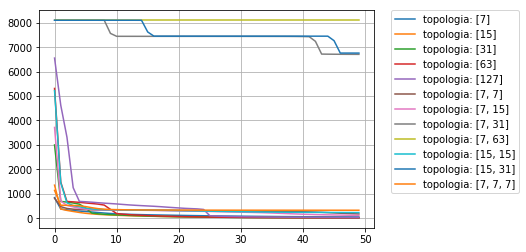

In [7]:
all_sizes = []
all_sizes.append([7])
all_sizes.append([15])
all_sizes.append([31])
all_sizes.append([63])
all_sizes.append([127])
all_sizes.append([7,7])
all_sizes.append([7,15])
all_sizes.append([7,31])
all_sizes.append([7,63])
all_sizes.append([15,15])
all_sizes.append([15,31])
all_sizes.append([7,7,7])
w_           = []
error        = []
for L in all_sizes:
    [w,e,e_a] = RedNeuronalTrain(X_train,y_train,Lsizes=L,outputs=12,alpha=0.1,epochs=50)
    print('para sizes = ',L,', da un error de ', e)
    w_.append(w)
    error.append(e)
    plt.plot(e_a,label='topologia: '+str(L))
wOptimo = w_[np.argmin(error)]
topologiaOptima = all_sizes[np.argmin(error)]
plt.rcParams['figure.figsize'] = (16,30)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
predicted1      = []
Accuracy_train  = []
for j in range(0,len(all_sizes)):
    p1 = []
    for i in range(0,X_train.shape[0]):
        p1.append(np.argmax(Predict(X_train[i,:],w_[j])))
    predicted1.append(p1)
    Accuracy_train.append(np.sum(np.array(p1) == y_train)/X_train.shape[0])

In [10]:
predicted2      = []
Accuracy_val    = []
for j in range(0,len(all_sizes)):
    p2 = []
    for i in range(0,X_val.shape[0]):
        p2.append(np.argmax(Predict(X_val[i,:],w_[j])))
    predicted2.append(p2)
    Accuracy_val.append(np.sum(np.array(p2) == y_val)/X_val.shape[0])

In [11]:
d = {'1.topologia': all_sizes,'2. tasa de entrenamiento': Accuracy_train, '3. tasa de validación': Accuracy_val}
df = pd.DataFrame(data=d)
df

,1.topologia,2. tasa de entrenamiento,3. tasa de validación
0,[7],0.972166,0.920635
1,[15],0.986422,0.961905
2,[31],0.992532,0.942857
3,[63],0.992532,0.955556
4,[127],0.981670,0.923810
5,"[7, 7]",0.840462,0.780952
6,"[7, 15]",0.902240,0.860317
7,"[7, 31]",0.031908,0.041270
8,"[7, 63]",0.073999,0.082540
9,"[15, 15]",0.739986,0.676190


In [12]:
print('topologia óptima: ',topologiaOptima) 

topologia óptima:  [31]


In [13]:
predicted_test = []
for i in range(0,X_test.shape[0]):
    predicted_test.append(np.argmax(Predict(X_test[i,:],wOptimo)))
Accuracy_test = np.sum(np.array(predicted_test) == y_test)/X_test.shape[0]
print('Error de testing',100*(1.0-Accuracy_test),'%')
d = {'1. Label de prueba': y_test, '2. predicción final': predicted_test}
df = pd.DataFrame(data=d)
df

Error de testing 5.047318611987384 %


,1. Label de prueba,2. predicción final
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,5.0,5
5,7.0,7
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


In [25]:
estandar = np.std(np.array(df2.iloc[:,0:-1].copy()),axis=0)
e = np.argmax(estandar)
print(estandar)

[1.10320653e+01 1.89842473e+00 1.40099352e+00 6.23667359e-01
 3.79814176e-01 2.21358674e-01 1.62622259e-01 1.17393875e-01
 9.07604247e-02 7.00625368e-02 1.04780537e-14 7.00625368e-02
 3.17719858e+00 1.32655107e+00 8.94505565e-01 5.09035481e-01
 2.97011627e-01 1.94821387e-01 1.47948852e-01 1.26260112e-01
 1.14852939e-01 1.06977308e-01 3.52641374e-15 1.06977308e-01
 6.49142724e-01 6.40929541e-01 6.73356736e-01 6.74072714e-01
 5.99815407e-01 6.28316353e-01 6.14281462e-01 6.39394376e-01
 6.43700293e-01 6.65813452e-01 6.27827602e-01 6.65813452e-01
 8.42228965e-01 8.62619528e-01 9.14407273e-01 8.87014885e-01
 7.94866517e-01 8.24179403e-01 8.01850149e-01 8.54478421e-01
 8.61459939e-01 8.99684518e-01 8.25427873e-01 8.99684518e-01
 7.74424312e-01 3.62716687e-01 2.02596932e-01 1.24708460e-01
 7.55690361e-02 5.37558807e-02 3.46595160e-02 2.71600275e-02
 2.15140805e-02 1.86059527e-02 9.44089402e-16 1.86059527e-02
 8.80807976e-01 3.63968226e-01 2.96911637e-01 1.17090212e-01
 8.26806676e-02 4.942132

In [23]:
x1 = np.linspace(-2,5,1000)
x2 = np.linspace(-5,5,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

Xnew = np.concatenate((x1,x2),axis=1)

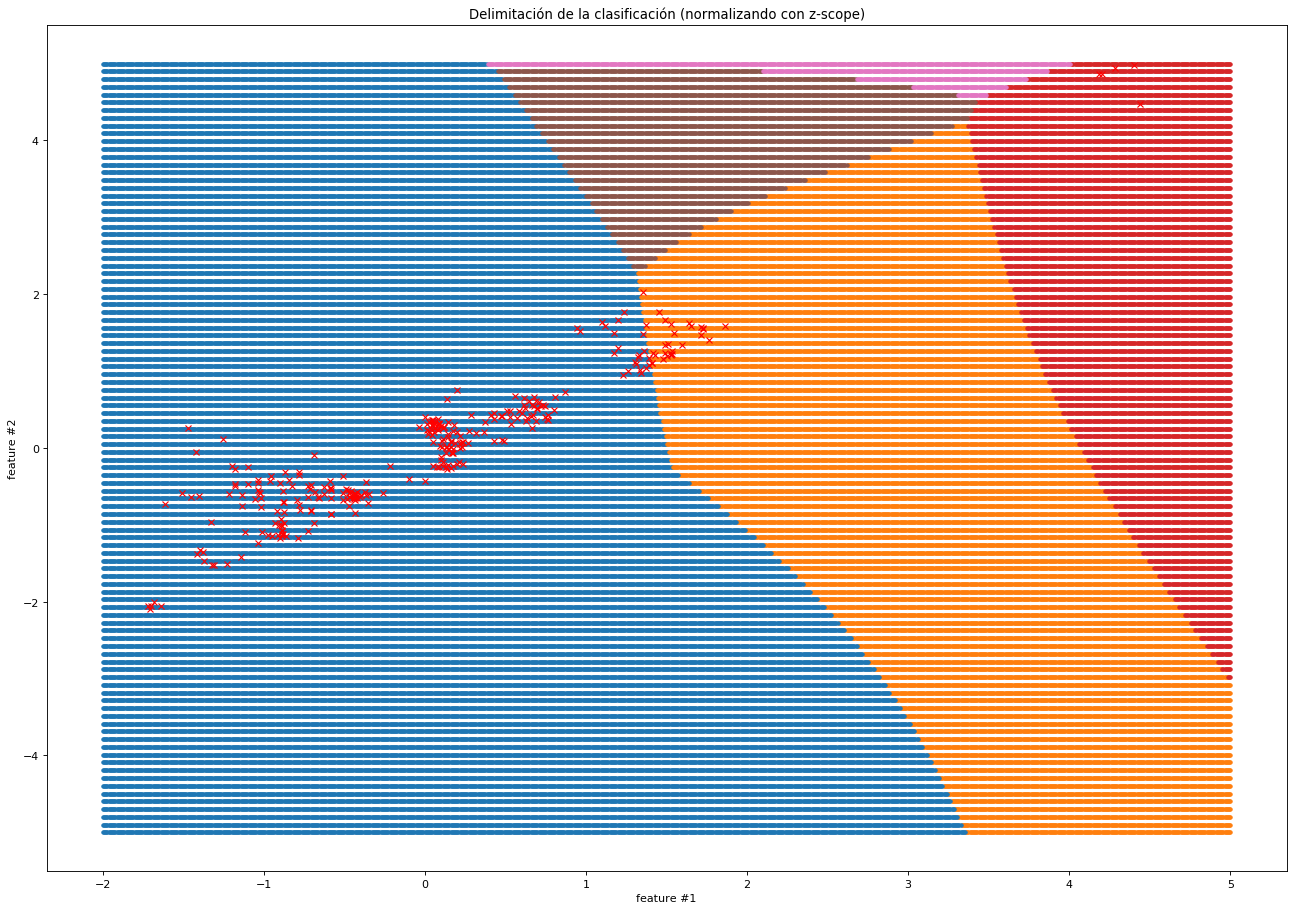

In [30]:
X_norm = (Xnew-np.mean(Xnew,axis=0))/(np.std(Xnew,axis=0))
predicted = []
for i in range(0,Xnew.shape[0]):
    a = np.array(X_norm[i])
    b = np.zeros(X1.shape[1]-2)
    predicted.append(np.argmax(Predict(np.concatenate((a,b),axis=0),w_[3])))
    
n1  = []
n2  = []
n3  = []
n4  = []
n5  = []
n6  = []
n7  = []
n8  = []
n9  = []
n10 = []
n11 = []
n12 = []
for i in range(0,X_norm.shape[0]):
    if predicted[i]==0:
        n1.append(i)
    elif predicted[i]==1:
        n2.append(i)
    elif predicted[i]==2:
        n3.append(i)  
    elif predicted[i]==3:
        n4.append(i)  
    elif predicted[i]==4:
        n5.append(i)
    elif predicted[i]==5:
        n6.append(i) 
    elif predicted[i]==6:
        n7.append(i) 
    elif predicted[i]==7:
        n8.append(i) 
    elif predicted[i]==8:
        n9.append(i) 
    elif predicted[i]==9:
        n10.append(i)
    elif predicted[i]==10:
        n11.append(i) 
    else:
        n12.append(i)


plt.figure(figsize=(20, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Xnew[n1 ,0],Xnew[n1 ,1],'.')
plt.plot(Xnew[n2 ,0],Xnew[n2 ,1],'.')
plt.plot(Xnew[n3 ,0],Xnew[n3 ,1],'.')
plt.plot(Xnew[n4 ,0],Xnew[n4 ,1],'.')
plt.plot(Xnew[n5 ,0],Xnew[n5 ,1],'.')
plt.plot(Xnew[n6 ,0],Xnew[n6 ,1],'.')
plt.plot(Xnew[n7 ,0],Xnew[n7 ,1],'.')
plt.plot(Xnew[n8 ,0],Xnew[n8 ,1],'.')
plt.plot(Xnew[n9 ,0],Xnew[n9 ,1],'.')
plt.plot(Xnew[n10,0],Xnew[n10,1],'.')
plt.plot(Xnew[n11,0],Xnew[n11,1],'.')
plt.plot(Xnew[n12,0],Xnew[n12,1],'.')

plt.plot(X_test[:,(e)],X_test[:,(e+1)],'rx')

plt.title('Delimitación de la clasificación (normalizando con z-scope)')
plt.xlabel('feature #1')
plt.ylabel('feature #2')

plt.show()